### Transformation of features

why transformation of features are required?

1. Linear Regression ---Gradient Descent --- Global Minima
2. Algorithms like KNN,K means,Hierarchical Clustering -- Eucleidean Distance

Every points are some vectors and direction.

It is also used in some deep learning techniques are the,(Standardization,Scaling)
1. ANN --- Global Minima,Gradient
2. CNN --- Used in pixels 0-255
3. RNN

#### Types of Transformation

1. Normalization and Standardization
2. Scaling to Minimum and Maximum values
3. Scaling to Median and Quantiles
4. Gaussian Transformation
   - Logarithmic Transformation
   - Reciprocal Transformation
   - Square root Transformation
   - Exponential Transformation
   - Box Cox Transformation

### 1. Normalization and Standardization
#### Standardization
    We try to bring all the variables or features to a similar scale,Standardization means centering the variable at zero.
    formula z = (x-x_mean)/std

In [3]:
# perform standardization

import pandas as pd
df = pd.read_csv('D:\\Feature Engineering\\Datasets\\Titanic Datasets\\train.csv',usecols = ['Pclass','Age','Fare','Survived'])

In [4]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [5]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [6]:
df['Age'].fillna(df['Age'].median(),inplace = True)

In [7]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [8]:
df.head(10)

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
5,0,3,28.0,8.4583
6,0,1,54.0,51.8625
7,0,3,2.0,21.0750
8,1,3,27.0,11.1333
9,1,2,14.0,30.0708


In [9]:
df

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
...,...,...,...,...
886,0,2,27.0,13.0000
887,1,1,19.0,30.0000
888,0,3,28.0,23.4500
889,1,1,26.0,30.0000


In [10]:
## Standardization : we use standardization from sklearn library
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# fit vs fit_transform
# fit is used to fit the machine learning models and fit_transform is used to fit and used after for transformation

df_scaled = scaler.fit_transform(df)

In [11]:
# Convert into dataframe 
scaled = pd.DataFrame(df_scaled)

In [12]:
scaled

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [13]:
# Change the values to original dataframe
df = scaled.copy()

In [14]:
df.columns = ['Survived','Pclass','Age','Fare']

In [15]:
df

,Survived,Pclass,Age,Fare
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [16]:
# We need to visualize things
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <BarContainer object of 20 artists>)

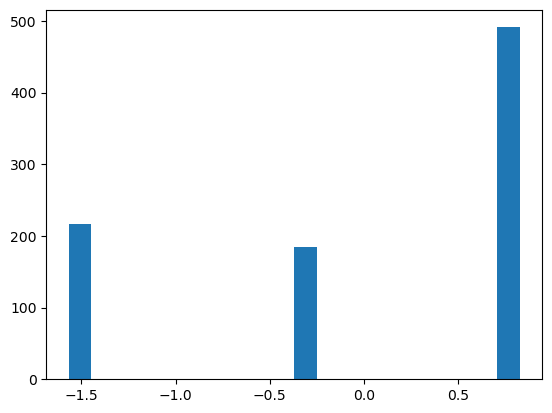

In [17]:
plt.hist(df['Pclass'],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <BarContainer object of 20 artists>)

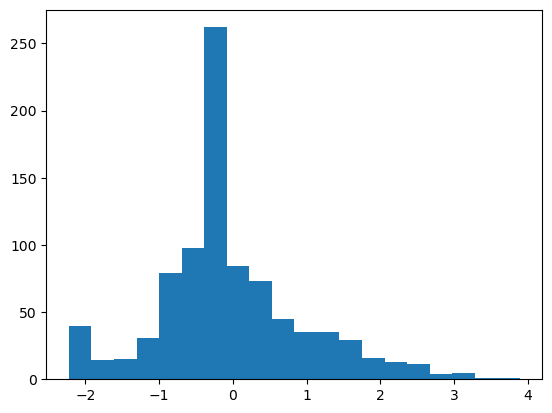

In [18]:
plt.hist(df['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

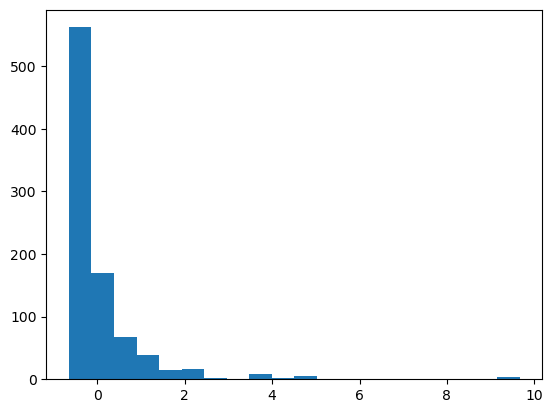

In [19]:
plt.hist(df['Fare'],bins=20)

some of the outliers are present according to the above graph

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([-0.78927234, -0.68645923, -0.58364612, -0.48083301, -0.37801991,
        -0.2752068 , -0.17239369, -0.06958059,  0.03323252,  0.13604563,
         0.23885873,  0.34167184,  0.44448495,  0.54729805,  0.65011116,
         0.75292427,  0.85573737,  0.95855048,  1.06136359,  1.16417669,
         1.2669898 ]),
 <BarContainer object of 20 artists>)

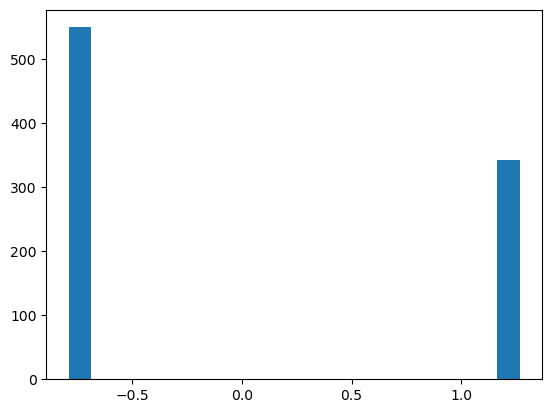

In [20]:
plt.hist(df['Survived'],bins=20)

### 2.Min Max Scaling  -- Mainly used in CNN (Deep Learning)
Min max scaling scales the values between 0 to 1.

  formula X_Scaled =(X - X.min)/(X.max - X.min)

In [21]:
# perform MinMax Scaling

import pandas as pd
df = pd.read_csv('D:\\Feature Engineering\\Datasets\\Titanic Datasets\\train.csv',usecols = ['Pclass','Age','Fare','Survived'])
df['Age'].fillna(df.Age.median(),inplace = True)

from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
scaled_minmax = minmax_scaler.fit_transform(df)

# Passing in Dataframe
import pandas as pd
scaled_data = pd.DataFrame(scaled_minmax,columns = ['Survived','Pclass','Age','Fare'])
scaled_data

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713
...,...,...,...,...
886,0.0,0.5,0.334004,0.025374
887,1.0,0.0,0.233476,0.058556
888,0.0,1.0,0.346569,0.045771
889,1.0,0.0,0.321438,0.058556


See Survived and Pclass column is range between from 0 to 1.So it stil same.

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

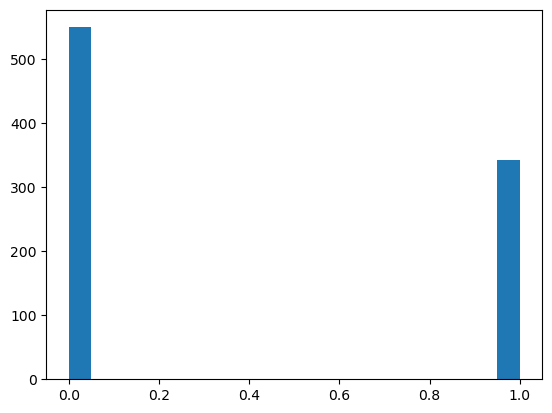

In [22]:
plt.hist(scaled_data['Survived'],bins=20)

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

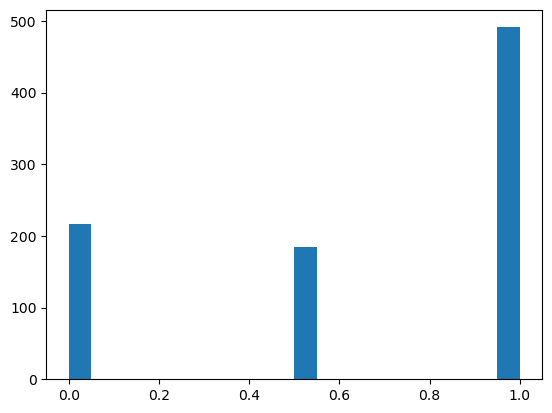

In [23]:
plt.hist(scaled_data['Pclass'],bins=20)

Likewise,Perform all the features we want.
#### Note:
- If the data is normally distributed,then convert to standard normal distribution at that time use Standardization
- Scaling techniques mostly used in deep learning and based on the data

Most important technique is Standardization.It works well in so many use cases

### 3.Robust Scaler  
It is used to scale the feature to median and quantiles

Scaling using median and quantiles consists of subtracting the median to all the observation , and then dividing by the
interquartile difference is the difference between th 75th and 25th quantile.

IQR = 75th quantile - 25th quantile

Formula:
X_Scaled = (X - X.median)/IQR

ex: 1,2,3,4,5,6,7,8,9,10

1 --- 10% it means 10% all values in the group is less than 1 <br>
2 --- 20% it means 20% all values in the group is less than 2<br>
5 --- 50% it means 10% all values in the group is less than 5

In [24]:
# perform Robust Scaler

import pandas as pd
df = pd.read_csv('D:\\Feature Engineering\\Datasets\\Titanic Datasets\\train.csv',usecols = ['Pclass','Age','Fare','Survived'])

# Replace Nan values
df['Age'].fillna(df.Age.median(),inplace = True)

# import necessary libraries

from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
robust_scaled_data = robust_scaler.fit_transform(df)

# To covert into dataframe
import pandas as pd
pd.DataFrame(robust_scaled_data,columns = df.columns)

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363
...,...,...,...,...
886,0.0,-1.0,-0.076923,-0.062981
887,1.0,-2.0,-0.692308,0.673281
888,0.0,0.0,0.000000,0.389604
889,1.0,-2.0,-0.153846,0.673281


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

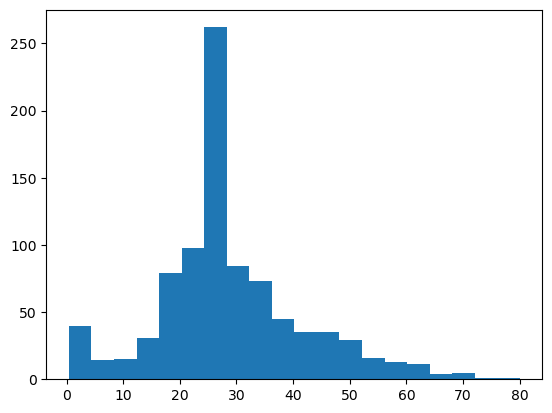

In [25]:
plt.hist(df['Age'],bins=20)

The main usage of robust scaler is to avoid outliers and captures the data between the 25th and 75th quartile range

### Gaussian Transformation

some machine learning algorithms like linear and logistic assume that the features are normally distributed.It works well and 
also better performance and accuracy.

In order to convert non distributed data into normal distribution,use following tehniques below,

   - Logarithmic Transformation
   - Reciprocal Transformation
   - Square root Transformation
   - Exponential Transformation
   - Box Cox Transformation

In [26]:
# import the necessary dataset
import pandas as pd
df = pd.read_csv('D:\\Feature Engineering\\Datasets\\Titanic Datasets\\train.csv',usecols = ['Age','Fare','Survived'])
df['Age'].fillna(df.Age.median(),inplace = True)
df.head()


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [27]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [28]:
# Then check the wheather the dataset is normal distribution or not
# Using Q-Q plot to check the dataset is wheather gaussian or normal distribution
# Create the function for plotting two plots one is histogram and other one is QQ plot to knowing the distribution

import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stat
from matplotlib import pylab  

def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    plt.hist(df[feature])
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=plt) ## plot = pylab is used to assign some value for another axis(x)
    plt.show()

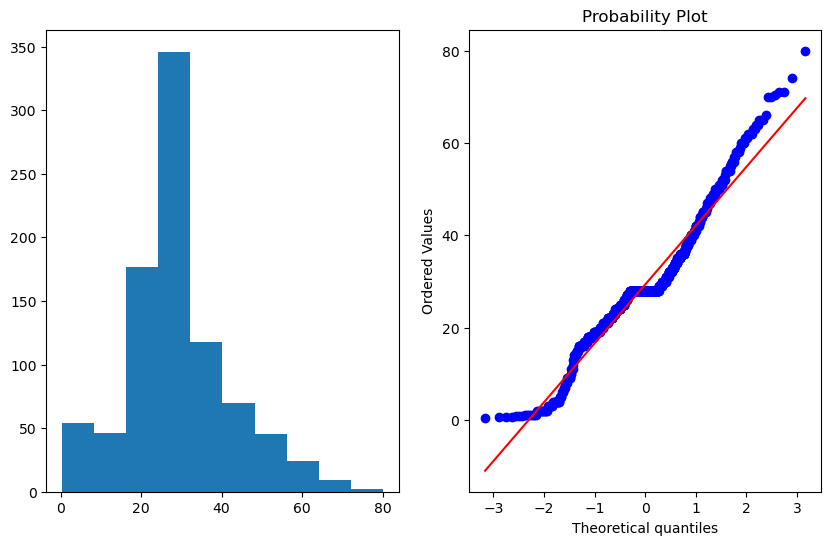

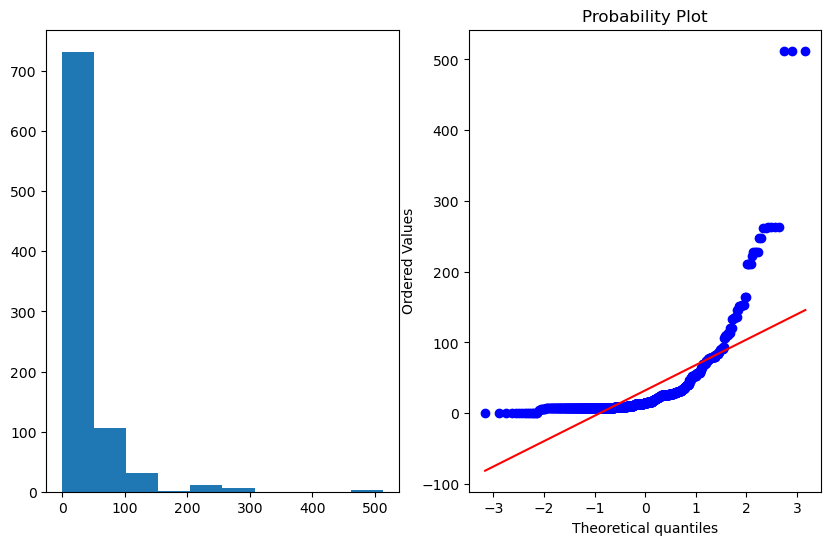

In [29]:
plot_data(df,'Age')
plot_data(df,'Fare')

The datapoints are passed correctly through the line,We can considered the data is normally distributed.

It is almost passed through the straight line.But we also try different transformation to convert perfectly.

The Theoretical quantiles are the x axis value(i.e it use standardizaton)

### Logarithmic Transformation
Logarithmic transformation is works well for right and left skewed data.That data is converted into Normal distribution

In [30]:
import numpy as np
# Using log from numpy

df['Age_Log'] = np.log(df['Age']) 
df['Fare_Log'] = np.log(df['Fare'] + 0.001) # Fare column has zero so zero divide is not possible so adding 0.001
df.head()

,Survived,Age,Fare,Age_Log,Fare_Log
0,0,22.0,7.2500,3.091042,1.981139
1,1,38.0,71.2833,3.637586,4.266676
2,1,26.0,7.9250,3.258097,2.070148
3,1,35.0,53.1000,3.555348,3.972196
4,0,35.0,8.0500,3.555348,2.085796


The warning message you are seeing, "divide by zero encountered in log," occurs when you attempt to take the logarithm of a value that is equal to or less than zero. In this case, it seems like you are trying to calculate the logarithm of some values in the 'Age' and 'Fare' columns, and some of these values are equal to zero or negative.

Taking the logarithm of zero or a negative number is mathematically undefined, which is why you're getting this warning. To handle this issue, you can add a small positive value to the data before taking the logarithm, or you can filter out or handle the problematic values in a way that makes sense for your analysis.

By adding 0.001 (or any small positive value) to the data, you ensure that you are not taking the logarithm of zero or a negative number, which should resolve the warning.

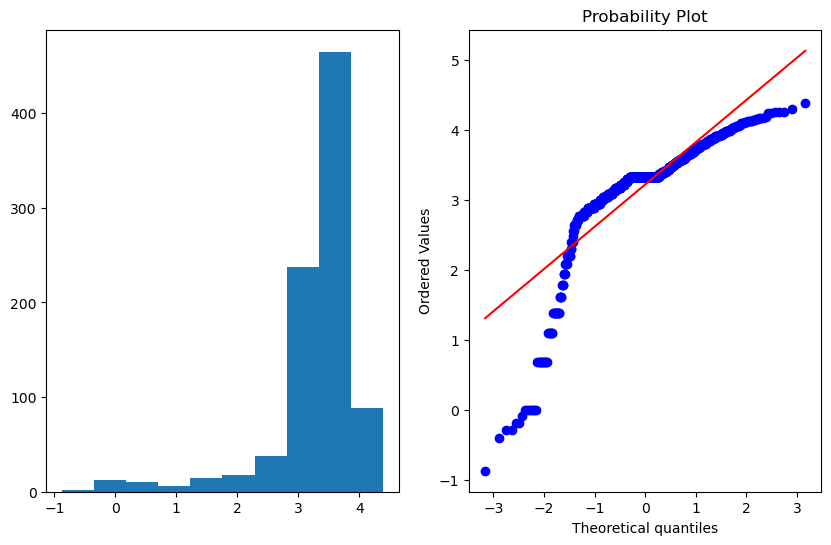

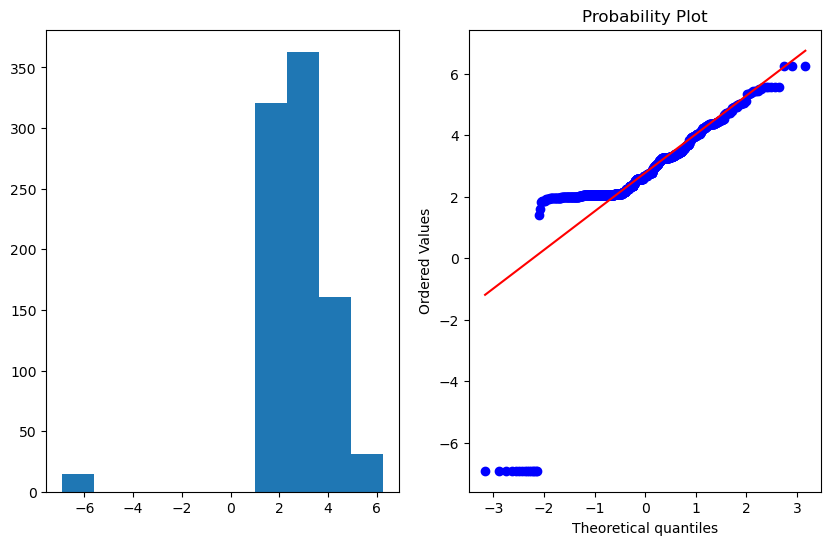

In [31]:
# Call the function to check
plot_data(df,'Age_Log')
plot_data(df,'Fare_Log')

Logarithmic transformation is not work well.So try different transformation

### Reciprocal Transformation

In [32]:
# Using Reciprocal formula
df['Age_Reciprocal'] = 1/df['Age']
df['Fare_Reciprocal'] = 1/df['Fare']

df.head()

,Survived,Age,Fare,Age_Log,Fare_Log,Age_Reciprocal,Fare_Reciprocal
0,0,22.0,7.2500,3.091042,1.981139,0.045455,0.137931
1,1,38.0,71.2833,3.637586,4.266676,0.026316,0.014029
2,1,26.0,7.9250,3.258097,2.070148,0.038462,0.126183
3,1,35.0,53.1000,3.555348,3.972196,0.028571,0.018832
4,0,35.0,8.0500,3.555348,2.085796,0.028571,0.124224


Sometimes show error for some features with respect to range like 000000000.11f range error like that in order to avoid that
create the plot from scratch again.

D:\Anaconda\Anaconda\lib\site-packages\numpy\lib\function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


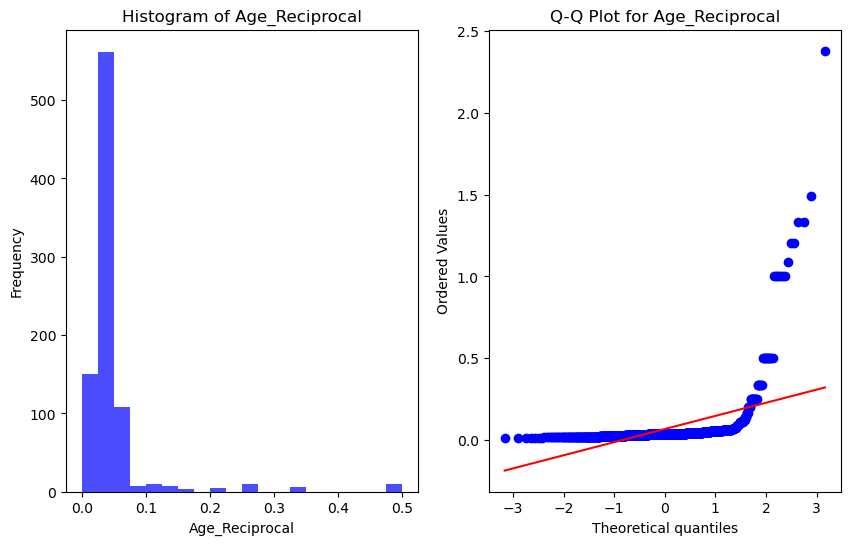

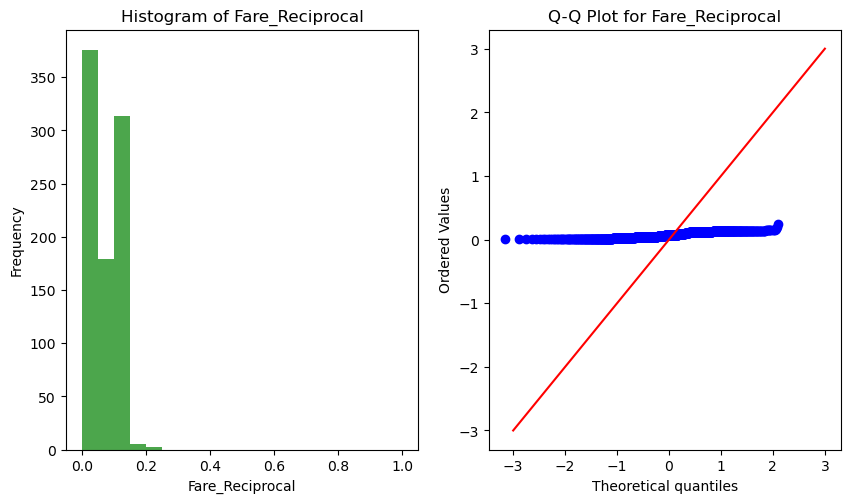

In [33]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib import pylab  


# Create a new figure for the first histogram and Q-Q plot
plt.figure(figsize=(10, 6))

# Plot histogram for Age_Reciprocal with a specified range
plt.subplot(1, 2, 1)
plt.hist(df['Age_Reciprocal'], bins=20, range=(0, 0.5), color='blue', alpha=0.7)
plt.title('Histogram of Age_Reciprocal')
plt.xlabel('Age_Reciprocal')
plt.ylabel('Frequency')

# Plot probability plot (Q-Q plot) for Age_Reciprocal
plt.subplot(1, 2, 2)
stats.probplot(df['Age_Reciprocal'], dist="norm", plot=pylab)
plt.title('Q-Q Plot for Age_Reciprocal')

# Create a new figure for the second histogram and Q-Q plot
plt.figure(figsize=(10, 12))

# Plot histogram for Fare_Reciprocal with a specified range
plt.subplot(2, 2, 1)
plt.hist(df['Fare_Reciprocal'], bins=20, range=(0, 1), color='green', alpha=0.7)
plt.title('Histogram of Fare_Reciprocal')
plt.xlabel('Fare_Reciprocal')
plt.ylabel('Frequency')

# Plot probability plot (Q-Q plot) for Fare_Reciprocal
plt.subplot(2, 2, 2)
stats.probplot(df['Fare_Reciprocal'], dist="norm", plot=pylab)
plt.title('Q-Q Plot for Fare_Reciprocal')

# Sometimes we need to draw Manually for some cases with the help of theoretical quantiles range(theoretical quantiles)
plt.plot([-3, 3], [-3, 3], color='red', linestyle='-')


# Show the plots
plt.show()


This transformation is also not works well check for other transformation method

### Square root Transformation

In [34]:
df['Age_Square'] = df['Age']**(1/2) # Applying Squareroot for transformation
df['Fare_Square'] = df['Fare']**(1/2)
df.head()

,Survived,Age,Fare,Age_Log,Fare_Log,Age_Reciprocal,Fare_Reciprocal,Age_Square,Fare_Square
0,0,22.0,7.2500,3.091042,1.981139,0.045455,0.137931,4.690416,2.692582
1,1,38.0,71.2833,3.637586,4.266676,0.026316,0.014029,6.164414,8.442944
2,1,26.0,7.9250,3.258097,2.070148,0.038462,0.126183,5.099020,2.815138
3,1,35.0,53.1000,3.555348,3.972196,0.028571,0.018832,5.916080,7.286975
4,0,35.0,8.0500,3.555348,2.085796,0.028571,0.124224,5.916080,2.837252


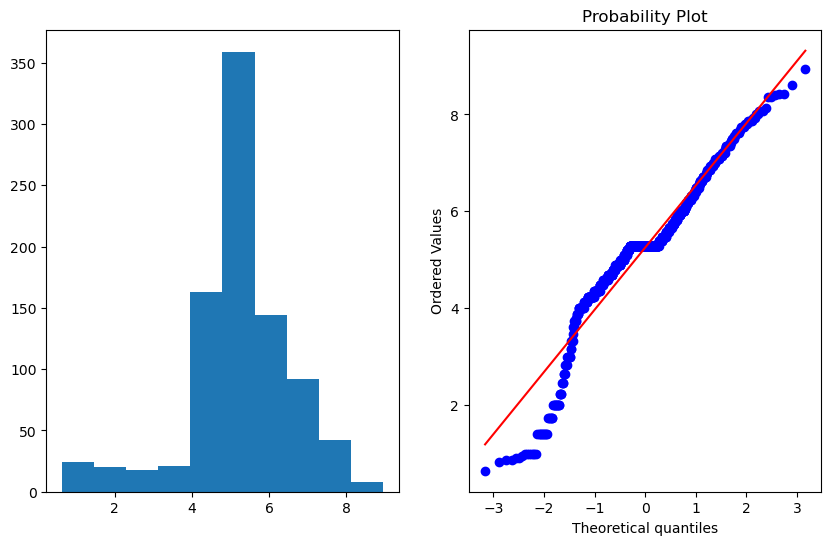

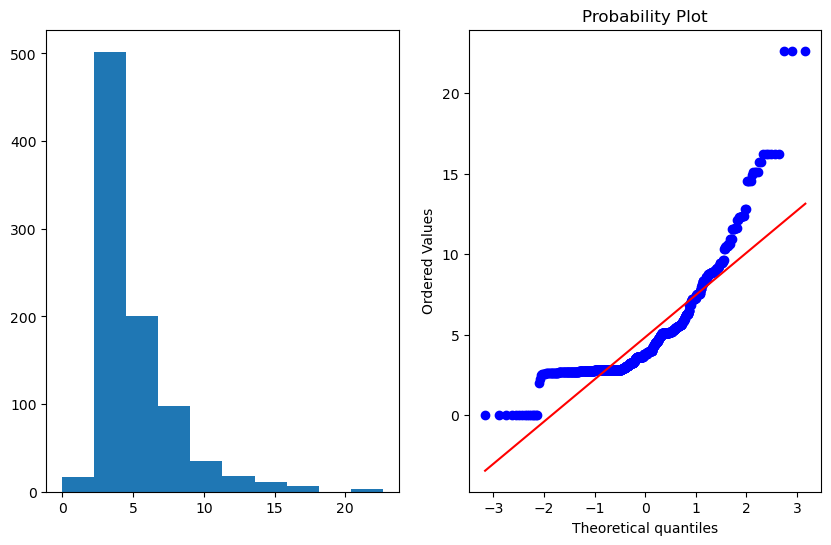

In [35]:
# Call the function to check
plot_data(df,'Age_Square')
plot_data(df,'Fare_Square')

This transformation is some works well in Age and not works well in Fare Moreover check for other transformation method


### Exponential Transformation

In [36]:
df['Age_Exponential'] = df['Age']**(1/1.2) # Mathmatically exponential value sometimes may be vary but it is common
df['Fare_Exponential'] = df['Fare']**(1/1.2)
df.head()

,Survived,Age,Fare,Age_Log,Fare_Log,Age_Reciprocal,Fare_Reciprocal,Age_Square,Fare_Square,Age_Exponential,Fare_Exponential
0,0,22.0,7.2500,3.091042,1.981139,0.045455,0.137931,4.690416,2.692582,13.142729,5.211327
1,1,38.0,71.2833,3.637586,4.266676,0.026316,0.014029,6.164414,8.442944,20.724608,35.007129
2,1,26.0,7.9250,3.258097,2.070148,0.038462,0.126183,5.099020,2.815138,15.105825,5.612625
3,1,35.0,53.1000,3.555348,3.972196,0.028571,0.018832,5.916080,7.286975,19.351889,27.389163
4,0,35.0,8.0500,3.555348,2.085796,0.028571,0.124224,5.916080,2.837252,19.351889,5.686302


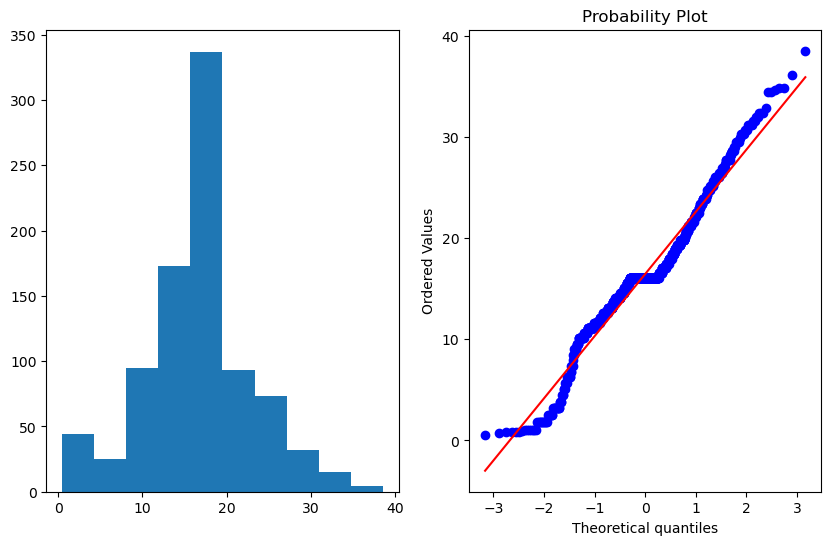

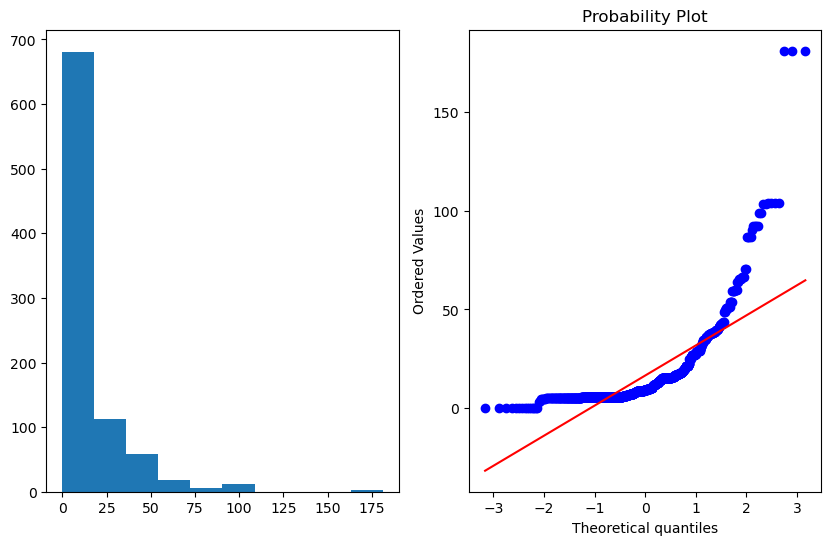

In [37]:
# Call the function to check
plot_data(df,'Age_Exponential')
plot_data(df,'Fare_Exponential')

This transformation is works well in Age and not works well in Fare Moreover check for other transformation method


### BoxCox Transformation

The BoxCox transformation is defined as:
    Formula: - T(Y) = (Y exp(λ) - 1 ) / λ 
    
    where Y is the response variable and λ is the transformtion parameter, λ varies from -5 to 5.In the transformation 
    all the values of λ are considered and the optimal value for a given variable is selected.
    
    More Detail Visit - https://chat.openai.com/share/23d73c98-3d8b-4672-a492-51bae0662f6a

In [66]:
import scipy.stats as stat
stat.boxcox(df['Age'])

(array([13.468119  , 21.4987284 , 15.56341683, 20.05611014, 20.05611014,
        16.58601436, 28.84746463,  0.92513402, 16.07664335,  9.01695462,
         2.53193075, 30.6104327 , 12.39181078, 21.97437834,  9.01695462,
        29.29062758,  0.92513402, 16.58601436, 18.09258499, 16.58601436,
        20.05611014, 19.56971919,  9.59722218, 16.58601436,  5.32265694,
        21.4987284 , 16.58601436, 11.84551333, 16.58601436, 16.58601436,
        22.44755196, 16.58601436, 16.58601436, 34.06447944, 16.58601436,
        23.38676361, 16.58601436, 12.93257404, 11.29332892,  9.01695462,
        22.44755196, 16.07664335, 16.58601436,  1.75636071, 11.84551333,
        16.58601436, 16.58601436, 16.58601436, 16.58601436, 11.29332892,
         4.65897047, 12.93257404, 26.60575762, 17.09169505, 33.6375945 ,
        16.58601436, 12.93257404, 16.83930618,  3.26857952,  7.221786  ,
        13.468119  , 21.4987284 , 24.77874367,  2.53193075, 16.58601436,
        16.58601436, 17.09169505, 11.84551333, 10.7

In [55]:
# Get the parameters Age
df['Age_BoxCox'],parameters = stat.boxcox(df['Age'])  # This is the proper syntax to get the parameter
# It means this function stat.boxcox(df['Age']) need two parameters are df['Age_BoxCox'] and parameters.

In [56]:
print(parameters)

0.7964531473656952


In [60]:
# Get the parameters for Fare
df['Fare_BoxCox'],parameters = stat.boxcox(df['Fare'] + 0.0001)  # This is the proper syntax to get the parameter
# Add 0.0001 to avoid negative and zero value
print(parameters)

0.2250294062718965


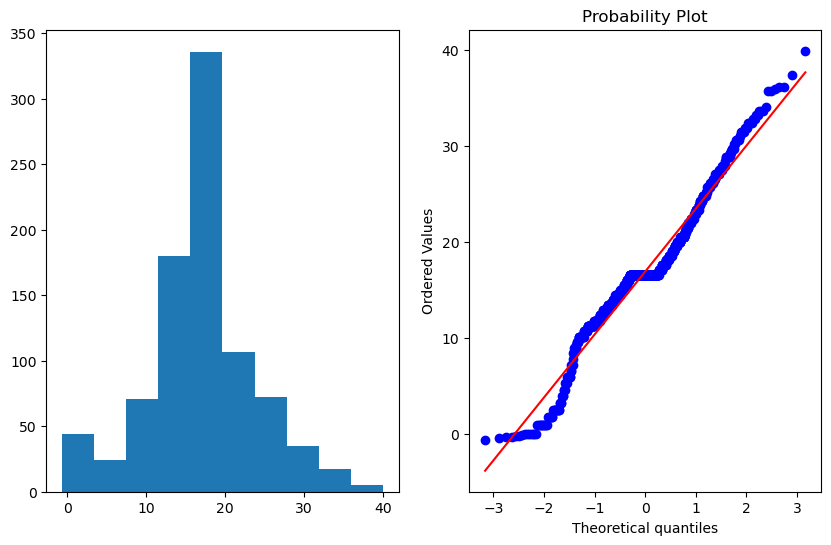

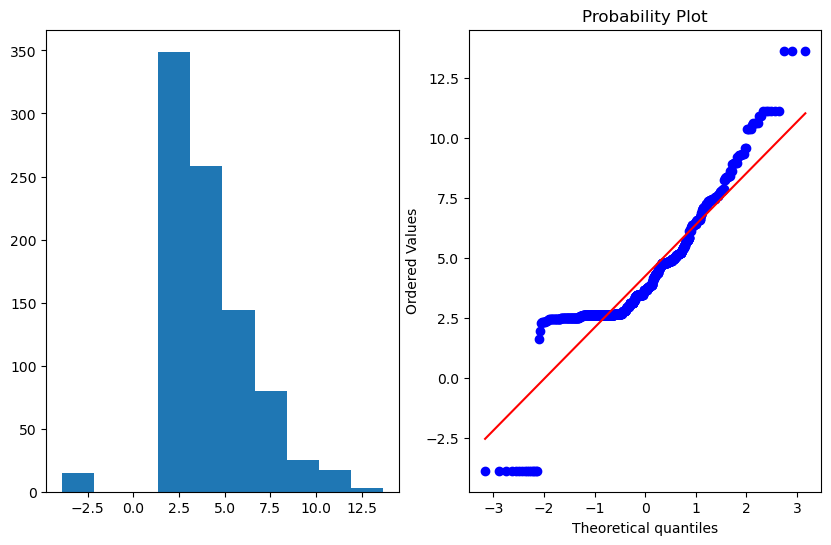

In [61]:
plot_data(df,'Age_BoxCox')
plot_data(df,'Fare_BoxCox')

Finally boxcox produce better results compare other transformation

In [65]:
df.head()

,Survived,Age,Fare,Age_Log,Fare_Log,Age_Reciprocal,Fare_Reciprocal,Age_Square,Fare_Square,Age_Exponential,Fare_Exponential,Age_Boxcox,Age_BoxCox,Fare_BoxCox
0,0,22.0,7.2500,3.091042,1.981139,0.045455,0.137931,4.690416,2.692582,13.142729,5.211327,13.468119,13.468119,2.496200
1,1,38.0,71.2833,3.637586,4.266676,0.026316,0.014029,6.164414,8.442944,20.724608,35.007129,21.498728,21.498728,7.163607
2,1,26.0,7.9250,3.258097,2.070148,0.038462,0.126183,5.099020,2.815138,15.105825,5.612625,15.563417,15.563417,2.636625
3,1,35.0,53.1000,3.555348,3.972196,0.028571,0.018832,5.916080,7.286975,19.351889,27.389163,20.056110,20.056110,6.419340
4,0,35.0,8.0500,3.555348,2.085796,0.028571,0.124224,5.916080,2.837252,19.351889,5.686302,20.056110,20.056110,2.661604
